In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
err_files=glob.glob("./report/BS_Matrices/ERR/*")

# Processing

In [3]:
def read_err_file(err_file):
    df=pd.read_csv(err_file).drop(columns=['Unnamed: 0'])
    num_bs=df.shape[1]
    index=columns=[f'BS{i}' for i in range(1,num_bs+1)]
    df.columns=columns
    df.index=index
    return df

down_count=0
up_count=0
for err_file in err_files:
    if 'up' in err_file:
        if up_count==0:
            df_up=read_err_file(err_file)
        else:
            df_up+=read_err_file(err_file)
        up_count+=1
    elif 'down' in err_file:
        if down_count==0:
            df_down=read_err_file(err_file)
        else:
            df_down+=read_err_file(err_file)
        down_count+=1

df_down_mean=(df_down/down_count).round(2)
df_up_mean=(df_up/up_count).round(2)
df_down_mean.to_csv("./report/BS_Matrices/MEAN/down_BS_err_matrix_mean.csv")
df_up_mean.to_csv("./report/BS_Matrices/MEAN/up_BS_err_matrix_mean.csv")

In [4]:
def plot_BS_Matrix_Err(df,save_name=None):
    max_value=df.max().max()
    min_value=df.min().min()
    rescale=lambda x:(x-min_value)/(max_value-min_value)

    boundaries=np.linspace(0,1,1000)
    hex_colors=sns.color_palette('flare', n_colors=len(boundaries)+2, as_cmap=False).as_hex()
    hex_colors = [hex_colors[i] for i in range(0, len(boundaries))]

    for i,v in enumerate(boundaries):
        if v>=rescale(-1.05) and v<=rescale(1.05):
            hex_colors[i]="#9ae59a"

    custom_color_map = LinearSegmentedColormap.from_list(name='custom_cmap',colors=list(zip(boundaries, hex_colors)))

    fig=plt.figure(figsize=(11,7))
    ax=fig.add_subplot(111)

#     cbar_bg = fig.add_axes([.085, .047, .545, .12])
#     cbar_bg.xaxis.set_ticks([])
#     cbar_bg.yaxis.set_ticks([])

    cbar_ax = fig.add_axes([.11, .1, .5, .02])
    sns.heatmap(df,annot=True,fmt=".1f",annot_kws={'fontweight':'bold'},
                cmap=custom_color_map,cbar_kws={"shrink": 0.1,'label':'Error (Min)',"orientation": "horizontal"},
                ax=ax,cbar_ax=cbar_ax)

    cbar = ax.collections[0].colorbar
    cbar.set_ticks([min_value,-1,0,1,max_value])
    cbar.set_ticklabels(['{:.1f}'.format(e) for e in cbar.get_ticks()])
    cbar.ax.tick_params(labelsize=16)
    cbar_ax.xaxis.set_label_position('top')
    cbar_ax.xaxis.label.set_font({"weight":"bold","size":16})

    ax.xaxis.tick_top()
    ax.set_xticklabels(ax.get_xticklabels(),rotation =30,fontsize=13,fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(),rotation =0,fontsize=13,fontweight='bold')
    ax.set_facecolor('#f2f2f2')

    for _, spine in ax.spines.items():
        if _ in ['left','top']:
            spine.set_visible(True)

    plt.tight_layout()
    #plt.close()
    fig.savefig("./report/plots/"+save_name)

C:\Users\WER\AppData\Local\Temp/ipykernel_9772/82514293.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


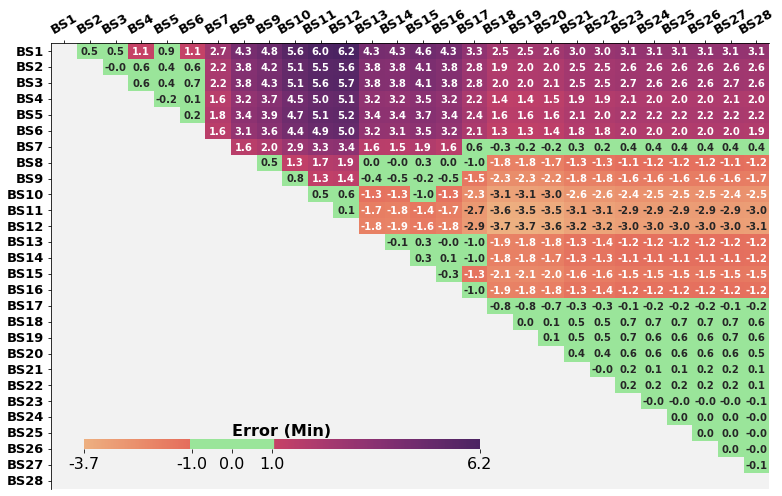

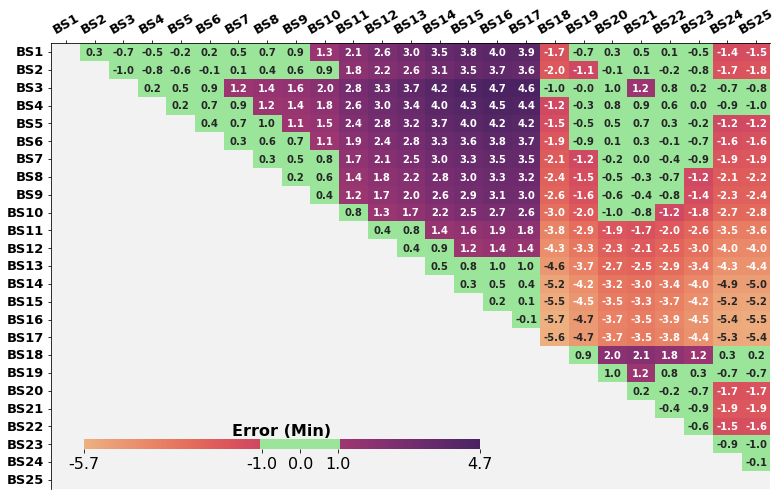

In [5]:
plot_BS_Matrix_Err(df_down_mean,"down_BS_err_matrix.png")
plot_BS_Matrix_Err(df_up_mean,"up_BS_err_matrix.png")

In [6]:
#NICE